Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation.

Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

Use SQLAlchemy create_engine to connect to your sqlite database.

Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [30]:
# Dependencies
# ----------------------------------
import pandas as pd
import datetime as dt
# Imports the method used for connecting to DBs
from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import func


# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float 

# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


C:\Users\dawzk\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\dawzk\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\dawzk\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\dawzk\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\dawzk\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\dawzk\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\

In [2]:
# Create Database Connection
# ----------------------------------

engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [3]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [4]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurements', 'stations']

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [8]:
# Assign the demographics class to a variable called `Demographics`
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [9]:
# Create a session
session = Session(engine)

In [156]:
# Use the session to query Demographics table and display the first 5 locations
for row in session.query(Station.name).limit(8).all():
    print(row)

('WAIKIKI 717.2, HI US',)
('KANEOHE 838.1, HI US',)
('KUALOA RANCH HEADQUARTERS 886.9, HI US',)
('PEARL CITY, HI US',)
('UPPER WAHIAWA 874.3, HI US',)
('WAIMANALO EXPERIMENTAL FARM, HI US',)
('WAIHEE 837.5, HI US',)
('HONOLULU OBSERVATORY 702.2, HI US',)


In [159]:
for row in session.query(Measurement.station).group_by(Measurement.station).all():
    print(row)

('USC00511918',)
('USC00513117',)
('USC00514830',)
('USC00516128',)
('USC00517948',)
('USC00518838',)
('USC00519281',)
('USC00519397',)
('USC00519523',)


In [16]:
#Design a query to retrieve the last 12 months of precipitation data (select only the date and prcp values).
#Load the query results into a Pandas DataFrame and set the index to the date column.
#Plot the results using the DataFrame plot method.

### BEGIN SOLUTION
date = dt.datetime(2016, 8, 23)

sel_prcp = [Measurement.date, 
       func.avg(Measurement.prcp)]
prcp_lst_yr = session.query(*sel_prcp).\
    filter(Measurement.date > date).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
### END SOLUTION
prcp_lst_yr

[('2016-08-24', 1.3328571428571425),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.05333333333333332),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.20857142857142857),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.45428571428571424),
 ('2016-09-01', 0.005),
 ('2016-09-02', 0.03571428571428571),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.056666666666666664),
 ('2016-09-06', 0.205),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.06571428571428573),
 ('2016-09-09', 0.15285714285714283),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.22),
 ('2016-09-13', 0.3871428571428571),
 ('2016-09-14', 2.04),
 ('2016-09-15', 0.7085714285714285),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.045714285714285714),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),


In [28]:
# Plot the Results
### BEGIN SOLUTION
prcp_df = pd.DataFrame(prcp_lst_yr, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)

prcp_df.head()

,prcp
date,
2016-08-24,1.332857
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.053333
2016-08-28,0.516667


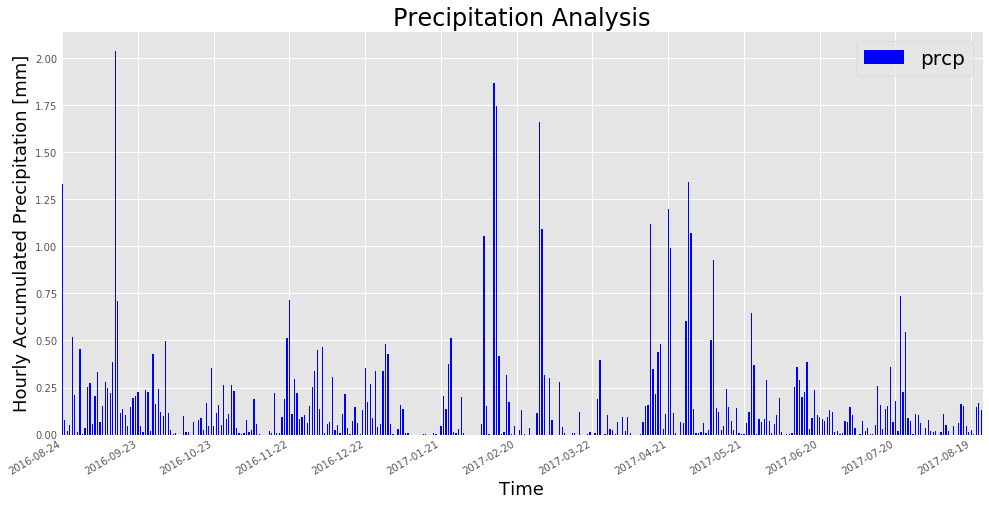

In [94]:
# Plotting
plt.clf()
prcp_df.plot(y='prcp',kind='bar',edgecolor='none',figsize=(16,8),linewidth=2, color='blue')
plt.legend(prop={'size':20}, loc='best')
plt.subplots_adjust(left=.1, right=0.9, top=0.9, bottom=.1)
plt.title('Precipitation Analysis',fontsize=24)
plt.ylabel('Hourly Accumulated Precipitation [mm]',fontsize=18,color='black')
ax = plt.gca()
plt.gcf().autofmt_xdate()

# skip ticks for X axis
#ax.set_xticklabels([dt.strftime('%Y-%m-%d') for dt in prcp_df.index])
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if (i % (30) != 0): # 24 hours * 7 days = 1 week
        tick.set_visible(False)

plt.xlabel('Time',fontsize=18,color='black')

plt.show()

# Station Analysis

In [64]:
#Design a query to calculate the total number of stations.
stations_cnt = session.query(Station).group_by(Station.station).count()
print(stations_cnt)

9


In [67]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
#Which station has the highest number of observations?
sel_cnt_st = [Measurement.station, 
       func.count(Measurement.date)]
st_actvty = session.query(*sel_cnt_st).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
st_actvty

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
st_cnt_df = pd.DataFrame(st_actvty, columns=['station', 'count'])
st_cnt_df.set_index('station', inplace=True)
st_cnt_df.head(9)

,count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [72]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
date = dt.datetime(2016, 8, 23)

sel_tobs = [Measurement.date, 
            Measurement.tobs]
tobs_lst_yr = session.query(*sel_tobs).\
    filter(Measurement.date > date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()
tobs_lst_yr

[('2016-08-24', 77),
 ('2016-08-25', 80),
 ('2016-08-26', 80),
 ('2016-08-27', 75),
 ('2016-08-28', 73),
 ('2016-08-29', 78),
 ('2016-08-30', 77),
 ('2016-08-31', 78),
 ('2016-09-01', 80),
 ('2016-09-02', 80),
 ('2016-09-03', 78),
 ('2016-09-04', 78),
 ('2016-09-05', 78),
 ('2016-09-06', 73),
 ('2016-09-07', 74),
 ('2016-09-08', 80),
 ('2016-09-09', 79),
 ('2016-09-10', 77),
 ('2016-09-11', 80),
 ('2016-09-12', 76),
 ('2016-09-13', 79),
 ('2016-09-14', 75),
 ('2016-09-15', 79),
 ('2016-09-16', 78),
 ('2016-09-17', 79),
 ('2016-09-18', 78),
 ('2016-09-19', 78),
 ('2016-09-20', 76),
 ('2016-09-21', 74),
 ('2016-09-22', 77),
 ('2016-09-23', 78),
 ('2016-09-24', 79),
 ('2016-09-25', 79),
 ('2016-09-26', 77),
 ('2016-09-27', 80),
 ('2016-09-28', 78),
 ('2016-09-29', 78),
 ('2016-09-30', 78),
 ('2016-10-01', 77),
 ('2016-10-02', 79),
 ('2016-10-03', 79),
 ('2016-10-04', 79),
 ('2016-10-05', 79),
 ('2016-10-06', 75),
 ('2016-10-07', 76),
 ('2016-10-08', 73),
 ('2016-10-09', 72),
 ('2016-10-10

In [74]:
tobs_df = pd.DataFrame(tobs_lst_yr, columns=['date', 'tobs'])
tobs_df.set_index('date', inplace=True)
tobs_df.head(9)

,tobs
date,
2016-08-24,77
2016-08-25,80
2016-08-26,80
2016-08-27,75
2016-08-28,73
2016-08-29,78
2016-08-30,77
2016-08-31,78
2016-09-01,80


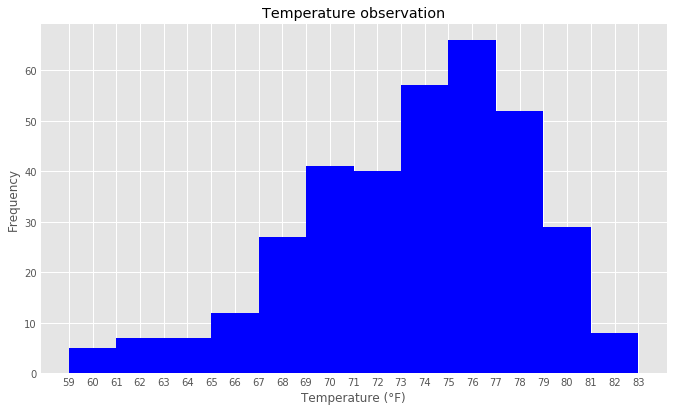

In [105]:
#Plot the results as a histogram with bins=12.
plt.clf()

num_bins=12
x= tobs_df

fig, ax = plt.subplots(figsize=(10,6))

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, color='blue')
ax.set_xlabel('Temperature (°F)')
ax.set_ylabel('Frequency')
ax.set_title('Temperature observation')
ax.legend(prop={'size':10})

plt.show()

# Temperature Analysis

In [106]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_dt, end_dt):
    min_tmp = session.query(func.min(Measurement.tobs)).filter(Measurement.date >= start_dt).filter(Measurement.date <= end_dt).order_by(Measurement.date).all()
    max_tmp = session.query(func.max(Measurement.tobs)).filter(Measurement.date >= start_dt).filter(Measurement.date <= end_dt).order_by(Measurement.date).all()
    avg_tmp = session.query(func.avg(Measurement.tobs)).filter(Measurement.date >= start_dt).filter(Measurement.date <= end_dt).order_by(Measurement.date).all()
    return min_tmp, max_tmp, avg_tmp



In [116]:
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")
start_dt = dt.datetime(2017, 4, 1)
end_dt = dt.datetime(2017, 4, 8)
temp_data = calc_temps(start_dt, end_dt)
temp_data

([(67)], [(79)], [(74.56818181818181)])

In [137]:
min_tmp = str(temp_data[0]).replace("[(", "")
max_tmp = str(temp_data[1]).replace("[(", "")
avg_tmp = str(temp_data[2]).replace("[(", "")
min_tmp = str(min_tmp).replace(",)]", "")
max_tmp = str(max_tmp).replace(",)]", "")
avg_tmp = str(avg_tmp).replace(",)]", "")
max_tmp = int(max_tmp)
min_tmp = int(min_tmp)
avg_tmp = float(avg_tmp)
error = max_tmp - min_tmp

print(min_tmp)
print(max_tmp)
print(avg_tmp)


67
79
74.56818181818181


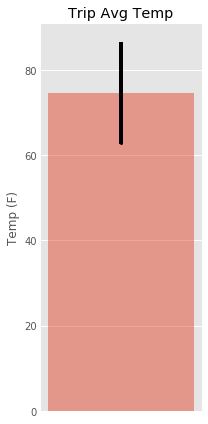

In [155]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
    #Use the average temperature as the bar height.
    #Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).
# Build the plot
plt.clf()
x_pos = [""]

fig, ax = plt.subplots(figsize=(3,6))
ax.bar(x_pos, avg_tmp, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=1)
ax.set_ylabel('Temp (F)')
#ax.set_xticks(x_pos)
#ax.set_xticklabels(materials)
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()